# **Student Dropout Prediction**

## **Contents**


*   Introduction

*   Exploratory Data Analysis

*   Data Preprocessing


*   Baseline Models

*   Hyperparameter Tuning






## **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report
from xgboost import XGBClassifier
import lightgbm as lgb

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

## **1. Introduction**





### **1.1. Data**

This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.  The final dataset has information on **4424 students**, each with **35 features**.


In [ ]:
data=pd.read_csv('dataset.csv')
data.rename(columns={'Nacionality':'Nationality'},inplace=True)

In [ ]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### **1.2. Project Objective**

The dataset contains extensive information on **4424 students**. It has **34 predictor variables** and the **target variable** Target which takes three possible values: **Dropout**, **Graduate** and **Enrolled**. The aim of the project is to build prediction models to classify whether the student gets dropout or not , given various relevant information in form of the 31 predictor variables, regarding that particular student.

### **1.3. Evaluation Metrics**

**Precision** and **Recall** are universally accepted metrics to capture the performance of a model, when restricted respectively to the **predicted positive class** and the **actual positive class**. Let us denote



*   **TP**: Number of true positives

*   **TN**: Number of true negatives
*   **FP**: Number of false positives

*   **FN**: Number of false negatives

In terms of these quantities, **Precision** and **Recall** are defined as

$$
\text{Precision} = \frac{TP}{TP + FP}, \quad
\text{Recall} = \frac{TP}{TP + FN}
$$

In student dropout prediction:



*  **Positive class** = student will drop out
*  **Negative class** = student will stay





Missing a student who is actually going to drop out (a False Negative) is costly, because:



*   The student receives no intervention
*   The institution loses the chance to prevent dropout




Hence,**Recall** is used in student dropout prediction because it measures the model’s ability to correctly identify students who are at risk of dropping out, minimizing **false negatives** and enabling timely intervention.







## **2. Exploratory Data Analysis**

### **2.1. Basic Data Exploration**

In [ ]:
print("Shape of the data: {}".format(data.shape))

Shape of the data: (4424, 35)


In [ ]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
print("Total number of columns: {}".format(len(data.columns)))

Total number of columns: 35


In [ ]:
data.dtypes

,0
Marital status,int64
Application mode,int64
Application order,int64
Course,int64
Daytime/evening attendance,int64
Previous qualification,int64
Nationality,int64
Mother's qualification,int64
Father's qualification,int64
Mother's occupation,int64


In [ ]:
duplicate = data[data.duplicated() == True]
print("Number of duplicate rows: {}".format(len(duplicate)))

Number of duplicate rows: 0


In [ ]:
print("Total number of missing values: {}".format(data.isna().sum().sum()))
print("Number of columns with missing values: {}".format(len(data.isnull().sum().tolist())-data.isnull().sum().tolist().count(0)))
print("Number of columns without missing values: {}".format(data.isnull().sum().tolist().count(0)))

Total number of missing values: 0
Number of columns with missing values: 0
Number of columns without missing values: 35


In [ ]:
#Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Data synopsis:


*   Number of observations: 4424
*   Number of columns: 35

*   Memory Usage: 1.2+ MB



*   Number of columns with missing values: 0













In [ ]:
print("Number of duplicate observations: {}".format(data.duplicated().sum()))

Number of duplicate observations: 0


In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### **2.2. Data Visualization**

In [ ]:
data_eda=data.copy(deep=True)

#### **Target Feature**
First we explore the values in the target column

In [ ]:
data_eda['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

From the target column we can infer the following:

* **Dropout**: The student dropped out
* **Graduate**: The student graduated
* **Enrolled**: The student is currently enrolled

([<matplotlib.patches.Wedge at 0x7e83d8c1c770>,
 [Text(0.0023433782798678937, 1.0999975038963667, 'Graduate'),
  Text(-0.5898573479025019, -0.9284763374073822, 'Dropout'),
  Text(0.9297307407531088, -0.5878781758992894, 'Enrolled')],
 [Text(0.0012782063344733963, 0.5999986384889273, '49.9%'),
  Text(-0.3217403715831828, -0.5064416385858448, '32.1%'),
  Text(0.5071258585926047, -0.32066082321779416, '17.9%')])

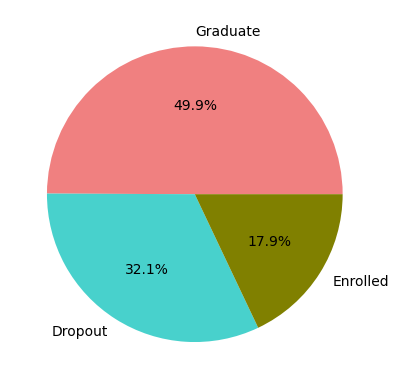

In [ ]:
#Chart-1
palette=['lightcoral','mediumturquoise','olive']
d=data_eda['Target'].value_counts().reset_index()
plt.pie(d['count'],labels=d['Target'],autopct='%1.1f%%',colors=palette)

**Observation**

* The graph shows that majority of the students are Graduates (49%)
* There are also more Dropouts (32.1%) than those currently Enrolled (17%)

#### **Age distribution of students**

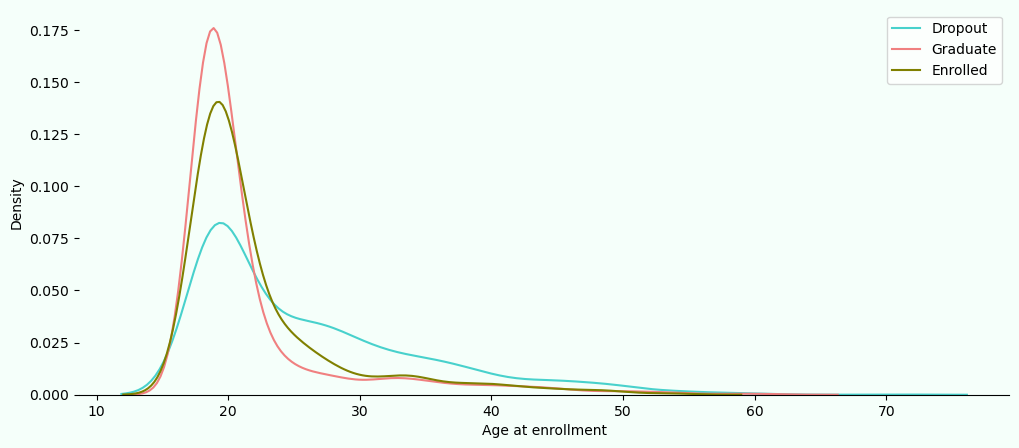

In [ ]:
#Chart-2
fig,ax=plt.subplots(figsize=(12,5))
fig.patch.set_facecolor('mintcream')
ax.set_facecolor('mintcream')


for spine in['top','right','left']:
        ax.spines[spine].set_visible(False)
sns.kdeplot(data_eda[data_eda['Target']=='Dropout']['Age at enrollment'],ax=ax,color='mediumturquoise')
sns.kdeplot(data_eda[data_eda['Target']=='Graduate']['Age at enrollment'],ax=ax,color='lightcoral')
sns.kdeplot(data_eda[data_eda['Target']=='Enrolled']['Age at enrollment'],ax=ax,color='olive')
ax.legend(['Dropout','Graduate','Enrolled'])

**Observation**



*   Distribution shows that the data is right skewed indicating that majority of the students are in their late teen's to early 20's
*   It is also observed that there was an increase in dropout rate from students in their mid 20's to early 30's




For the next set of data visualizations, we would be dealing with pie charts mostly. To reduce repeatability of code, two functions are created;

One to create dictionaries of all categories with respect to number of students enrolled, students who dropped out or graduated, the other would be to create pie charts based on the dictionaries created for visualization.

#### **Students courses**

In [ ]:
# Converting the courses back to categorical
data_eda['Course'] = data_eda['Course'].map({1: 'Biofuel Production Technologies',
 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing',
 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
 16: 'Basic Education', 17: 'Management (evening attendance)'})


<Axes: ylabel='Course'>

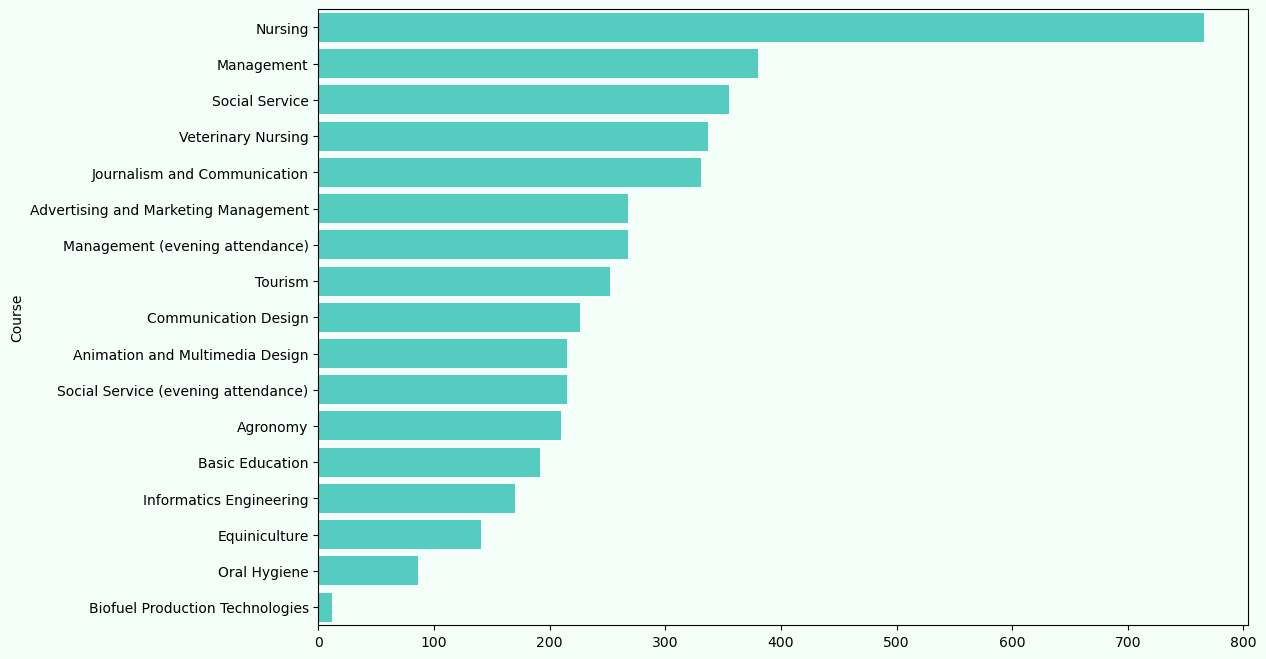

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('mintcream')
ax.set_facecolor('mintcream')
counts=data_eda['Course'].value_counts()
sns.barplot(x=counts.values,y=counts.index,color='turquoise')


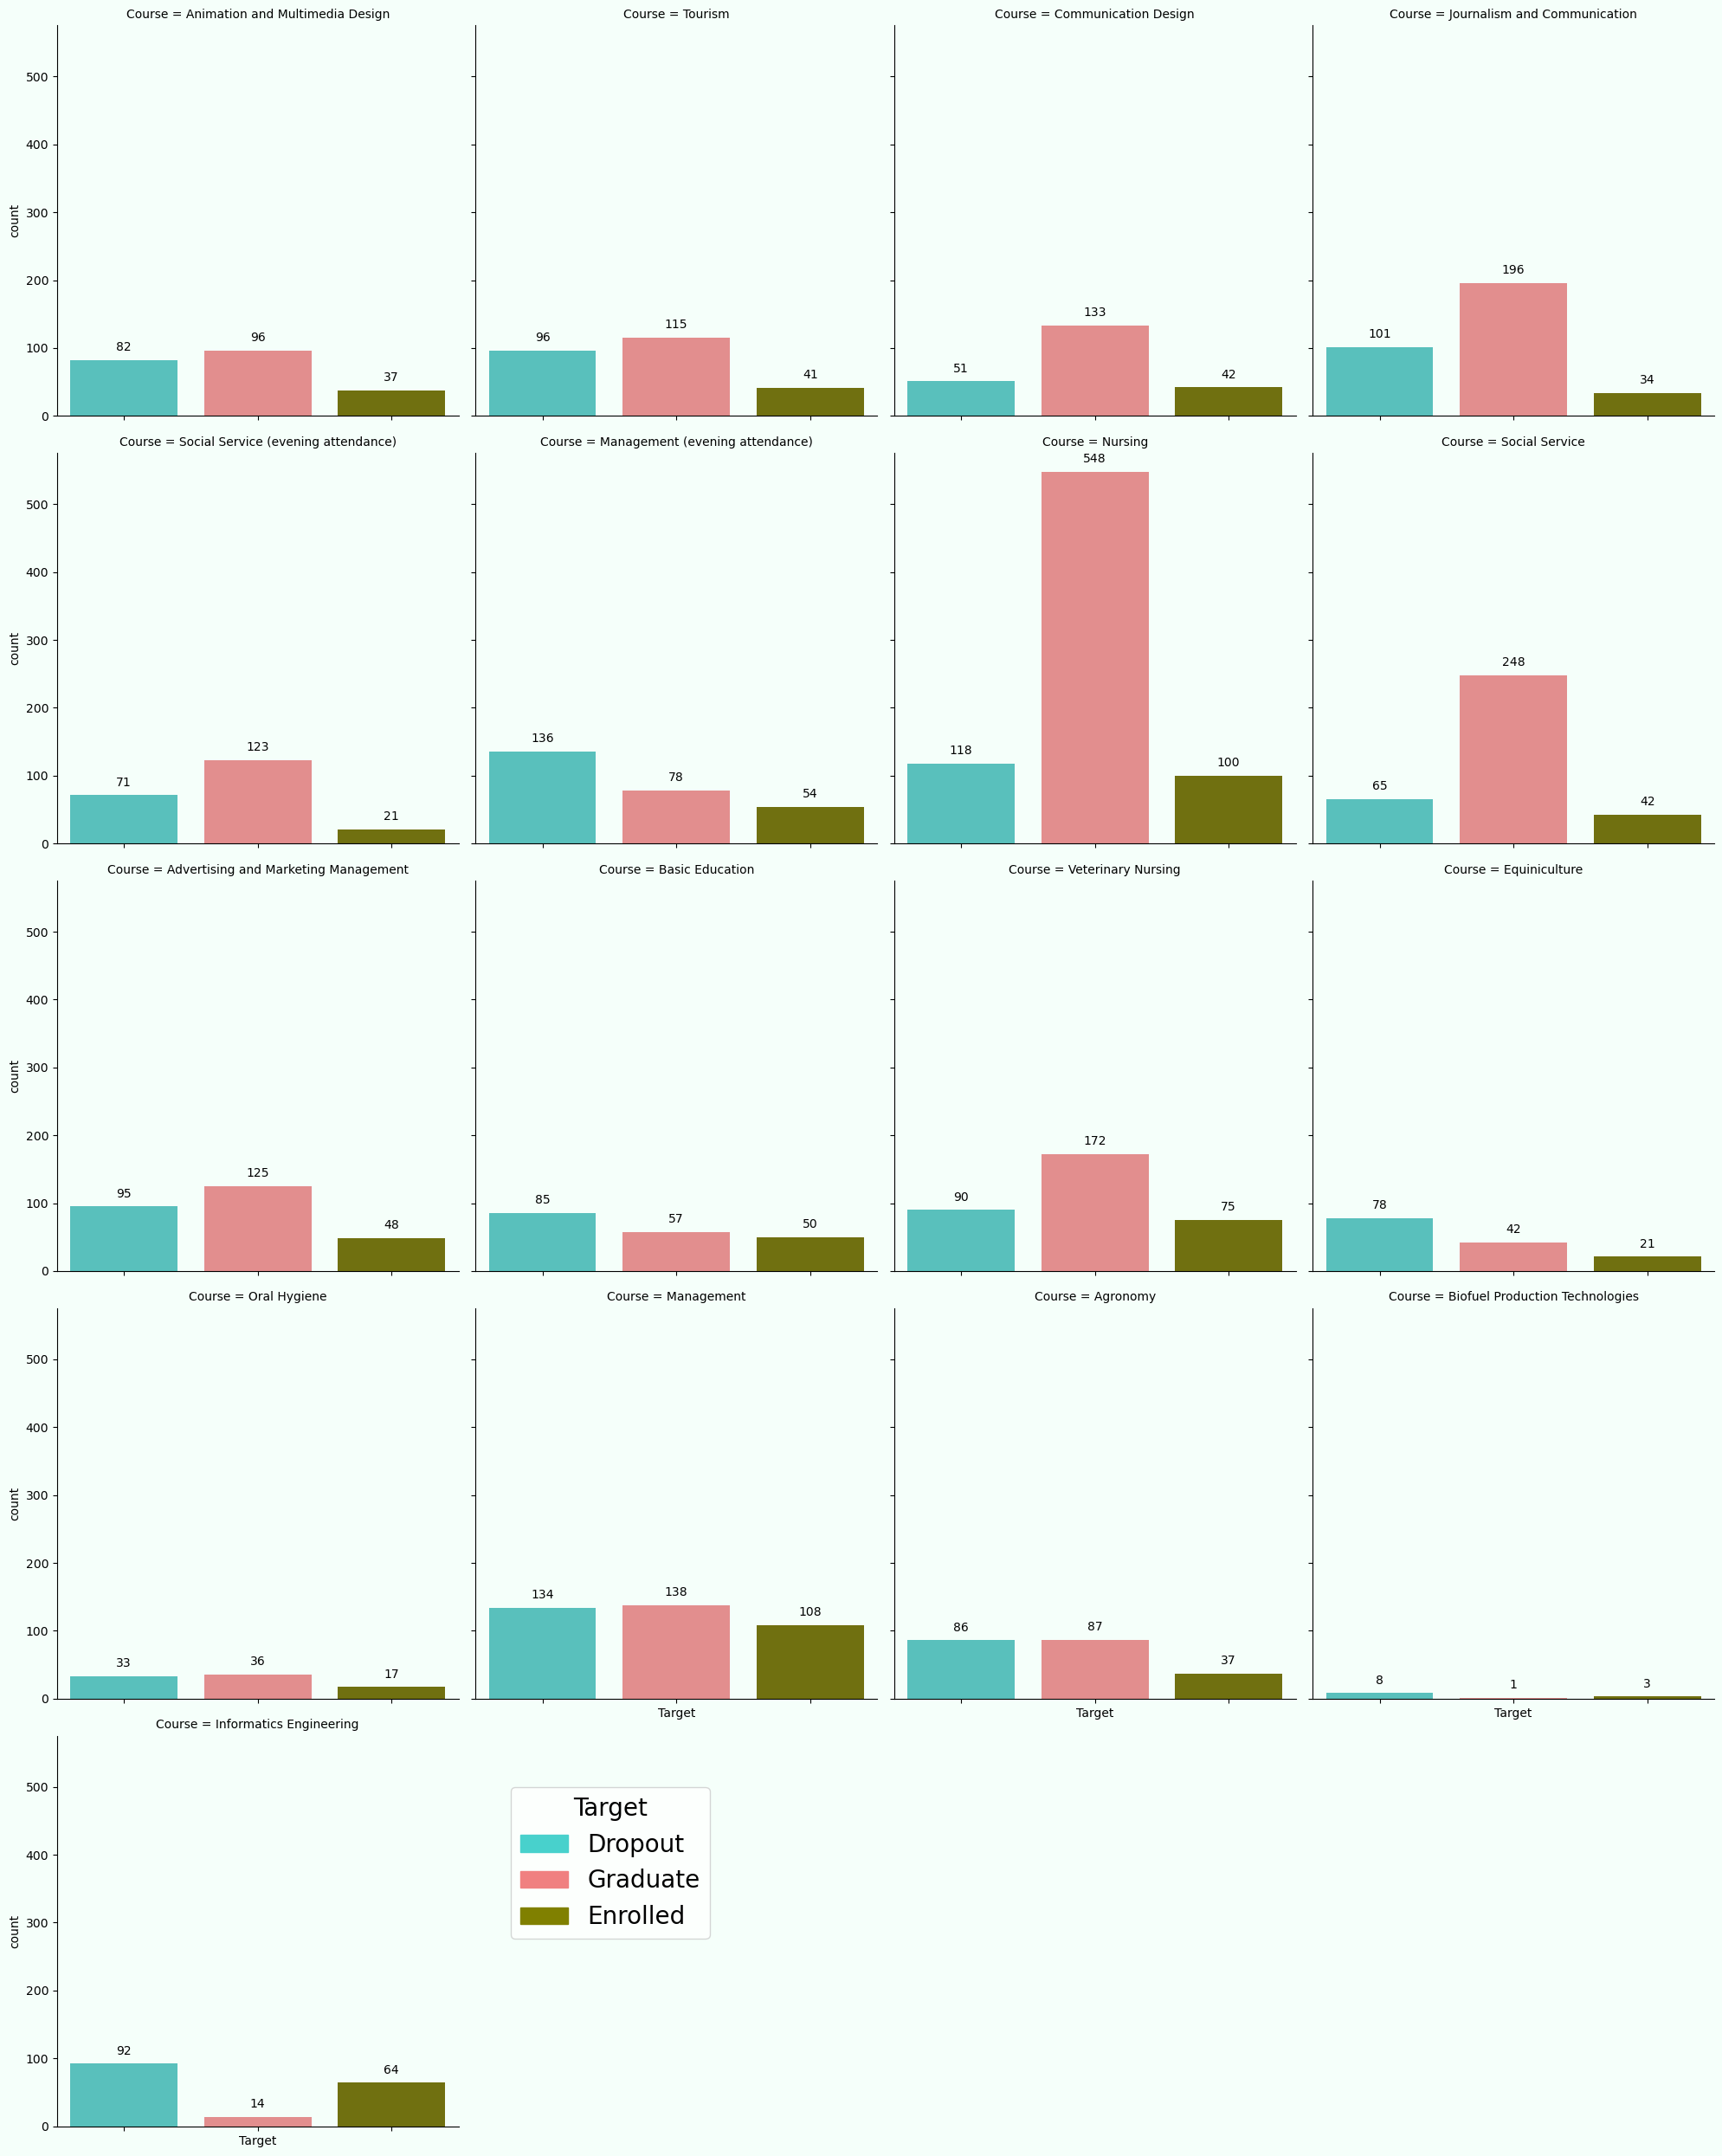

In [ ]:
palette=['mediumturquoise','lightcoral','olive']
custom_colors={'Dropout':'mediumturquoise','Graduate':'lightcoral','Enrolled':'olive'}

g=sns.catplot(x='Target',col='Course',col_wrap=4,data=data_eda,kind='count',height=5,aspect=1,sharex=True,hue='Target',palette=palette)
g.fig.set_facecolor('mintcream')

for ax in g.axes.flat:
    ax.set_facecolor('mintcream')
    for labels in ax.get_xticklabels():
         labels.set_visible(False)
    for p in ax.patches:
         height=p.get_height()
         ax.text(p.get_x() + p.get_width()/2,height+10,f'{int(height)}',ha='center',va='bottom',fontsize=10,color='black',fontstyle='normal')
plt.tight_layout()
handles=[patches.Patch(color=color ,label=label) for label,color in custom_colors.items()]
plt.legend(handles=handles,loc='upper left',title='Target',title_fontsize=20,bbox_to_anchor=(1.1,0.9),fontsize=20)

**Observation**

Majority of the students are enrolled in Nursing and it also had the lowest droput rate of about **15.4%**.

The course that had the highest dropout rate was **Biofuel Production Technologies (66.7%)** which is also had the least number of enrolled students followed by **Equiniculture (55.3%)**.

#### **Martial status**

In [ ]:
# Converting back to categorical
data_eda['Marital status'] = data_eda['Marital status'].map({1: 'Single',
 2: 'Married', 3: 'Widower',
 4: 'Divorced', 5: 'Facto Union',6:'Legally Separated'})

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Facto Union'),
  Text(4, 0, 'Legally Separated'),
  Text(5, 0, 'Widower')])

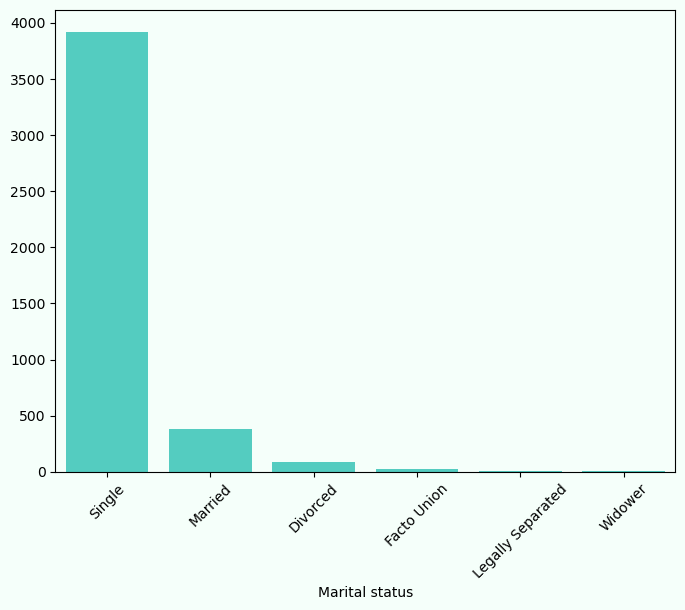

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
fig.patch.set_facecolor('mintcream')
ax.set_facecolor('mintcream')
counts=data_eda['Marital status'].value_counts()
sns.barplot(x=counts.index,y=counts.values,color='turquoise')
plt.xticks(rotation=45)

**Observations**

Vast majority of the students are single,

#### **Gender distribution of students**

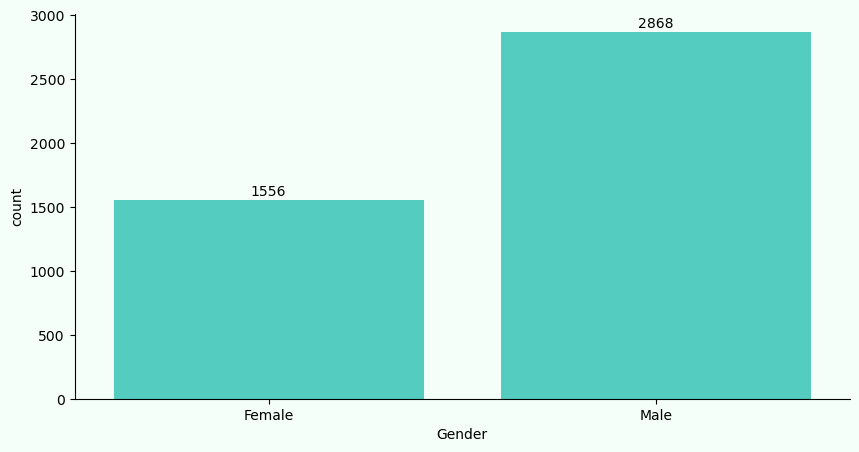

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('mintcream')
ax.set_facecolor('mintcream')

ax=sns.countplot(x=data_eda['Gender'].map({0:'Male',1:'Female'}),color='turquoise')
for spine in['top','right']:
        ax.spines[spine].set_visible(False)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() + p.get_width()/2,height+10,f'{int(height)}',ha='center',va='bottom',fontsize=10,color='black',fontstyle='normal')

**Observation**

There was a significant number of female students (64.8%) compared to the males (35.2%).

In [ ]:
data_eda['Gender']=data_eda['Gender'].map({0:'Male',1:'Female'})


In [ ]:
dict=[]
dict.append(data_eda[data_eda['Gender']=='Male']['Target'].value_counts())
dict.append(data_eda[data_eda['Gender']=='Female']['Target'].value_counts())
dict

[Target
 Graduate    1661
 Dropout      720
 Enrolled     487
 Name: count, dtype: int64,
 Target
 Dropout     701
 Graduate    548
 Enrolled    307
 Name: count, dtype: int64]

In [ ]:
def make_dictionaries(category_list,column,target,dict_list):
    for category in category_list:
        dict_list.append(data_eda[data_eda[column]==category][target].value_counts())
    return dict_list

In [ ]:
def apply(texts,autotexts):
    for text in texts:
        text.set_bbox({'boxstyle':'round','pad':0.3,'fc':'yellow','lw':1,'ec':'b','alpha':0.7})
    for auto in autotexts:
        auto.set_fontsize(10)
        auto.set_fontweight('bold')

In [ ]:
def pie(dict,cat_1,cat_2,title):
    label_1=dict[0].index
    label_2=dict[1].index
    colormap={'Dropout':'mediumturquoise',
    'Graduate':'lightcoral',
    'Enrolled':'olive'}
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    centre_circle_1=plt.Circle((0,0),0.80,fc='mintcream')
    centre_circle_2=plt.Circle((0,0),0.80,fc='mintcream')
    wedges_1,texts_1,autotexts_1=ax[0].pie(dict[0],labels=label_1,colors=[colormap[i] for i in label_1],wedgeprops={'width':0.3,'edgecolor':'white'},autopct='%1.1f%%')
    wedges_2,texts_2,autotexts_2=ax[1].pie(dict[1],labels=label_2,colors=[colormap[i] for i in label_2],wedgeprops={'width':0.3,'edgecolor':'white'},autopct='%1.1f%%')
    ax[0].add_artist(centre_circle_1)
    ax[1].add_artist(centre_circle_2)
    fig.suptitle(title,fontsize=20,fontfamily='serif')
    ax[0].set_title(cat_1,fontsize=15,fontfamily='serif')
    ax[1].set_title(cat_2,fontsize=15,fontfamily='serif')
    fig.patch.set_facecolor('mintcream')


    apply(texts_1,autotexts_1)
    apply(texts_2,autotexts_2)

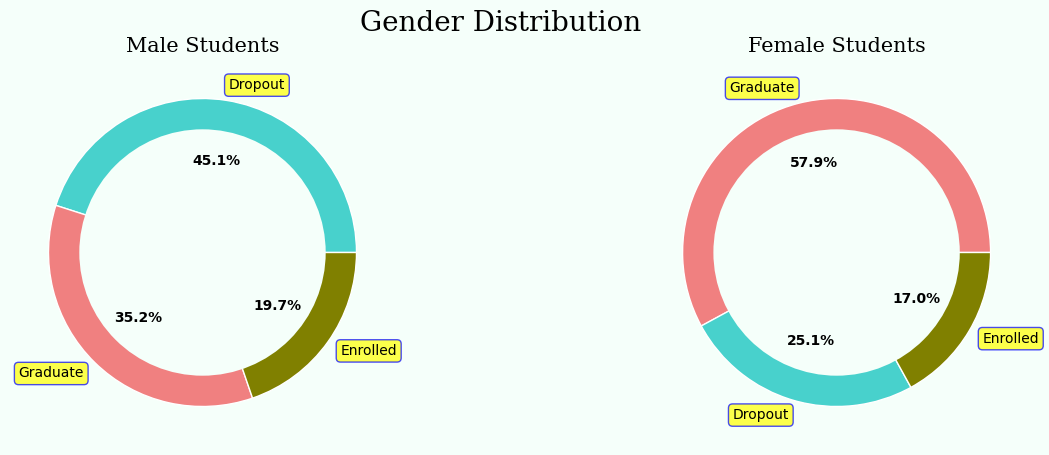

In [ ]:
gender=data_eda['Gender'].unique()
gender_dict=make_dictionaries(gender,'Gender','Target',[])
pie(gender_dict,'Male Students','Female Students','Gender Distribution')

**Observation**

It is observed that there was a higher rate of dropout students that were male (45.1%), compared to the females (25.1%).

#### **Student's Financial Status**

Next, we will analyze the financial status of students to understand how scholarship status, debt status, and tuition payment status correlate with dropout rates.

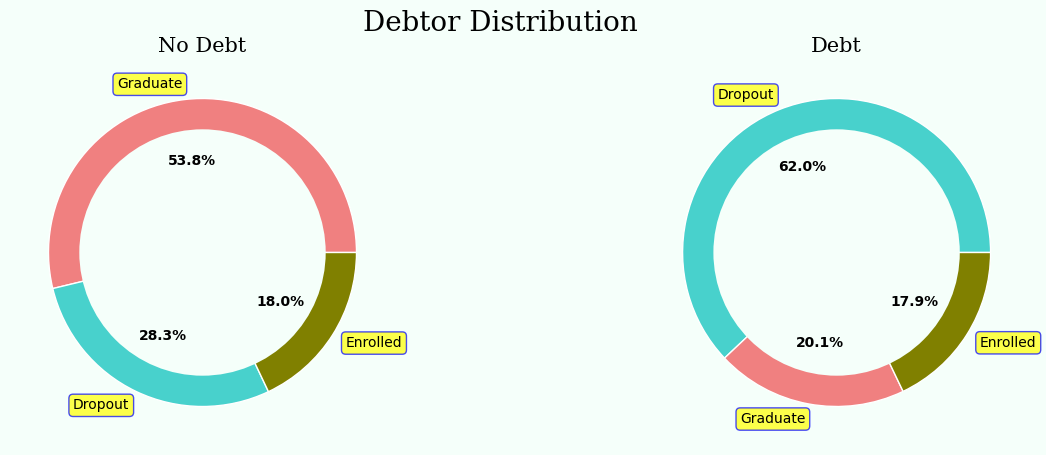

In [ ]:
debtor=data_eda['Debtor'].unique()
debtor_dict=make_dictionaries(debtor,'Debtor','Target',[])
pie(debtor_dict,'No Debt','Debt','Debtor Distribution')

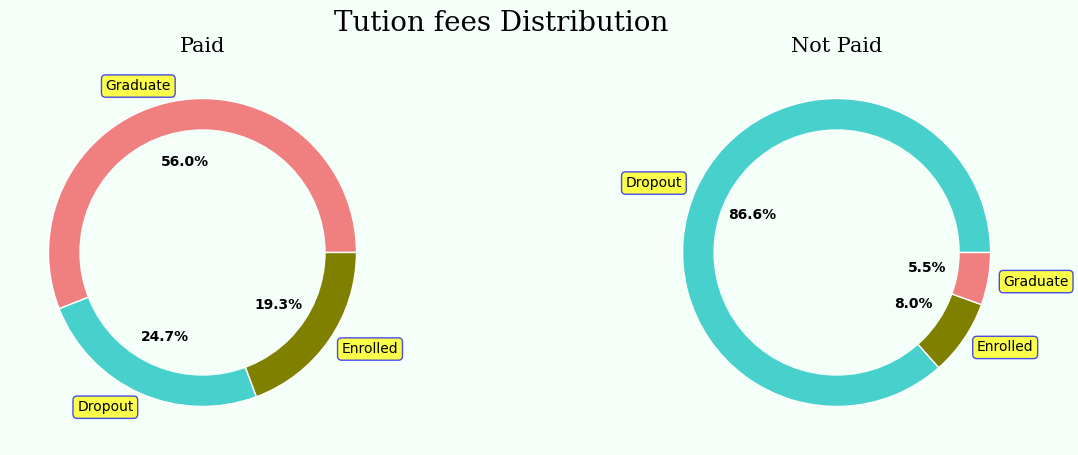

In [ ]:
tutionfees=data_eda['Tuition fees up to date'].unique()
tutionfees_dict=make_dictionaries(tutionfees,'Tuition fees up to date','Target',[])
pie(tutionfees_dict,'Paid','Not Paid','Tution fees Distribution')

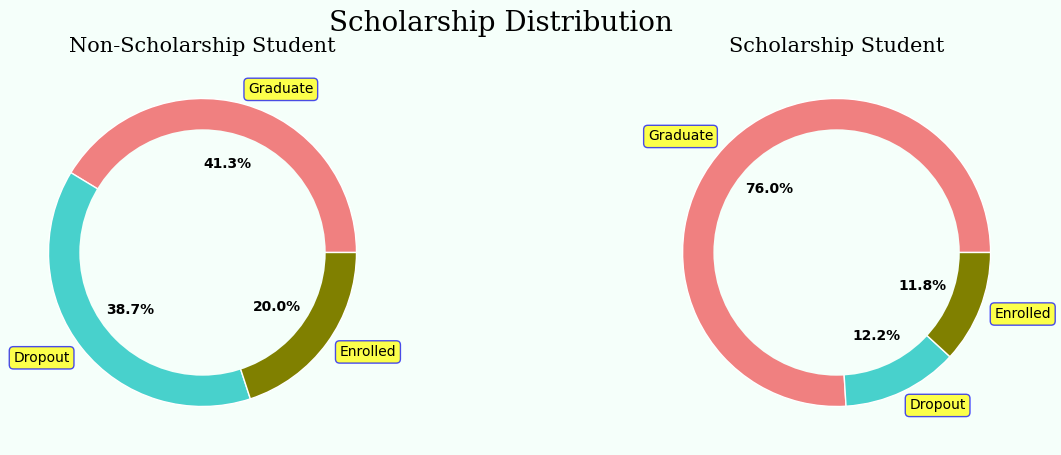

In [ ]:
scholarship=data_eda['Scholarship holder'].unique()
scholarship_dict=make_dictionaries(scholarship,'Scholarship holder','Target',[])
pie(scholarship_dict,'Non-Scholarship Student','Scholarship Student','Scholarship Distribution')

**Observation**

Unsurprisingly, students who were in **debt** and had not completed payment for **tuition** had a higher dropout rate of **62%** and **86.6%** respectively.

Similarly, students who were granted **scholarships** had a low dropout rate of **12.2%** compared to those who were not given (**38.7%**).

Based on our EDA, we have a good understanding of how the data is distributed by gender and age, as well as how certain features like courses enrolled and financial status correlate with the dropout rate. In the next phase, we will build and train a classification model to see if our findings are consistent with the model's results.

In [ ]:
data.drop(['Nationality', 'Mother\'s occupation', 'Father\'s qualification',
          'Unemployment rate','Inflation rate','GDP'], axis = 1, inplace = True)

In [ ]:
data_temp=data.copy(deep=True)

In [ ]:
def heatmap(data):
    fig=plt.figure(figsize=(36,27))
    fig.set_facecolor('mintcream')
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    sns.heatmap(data.corr(),cmap=plt.cm.CMRmap_r)

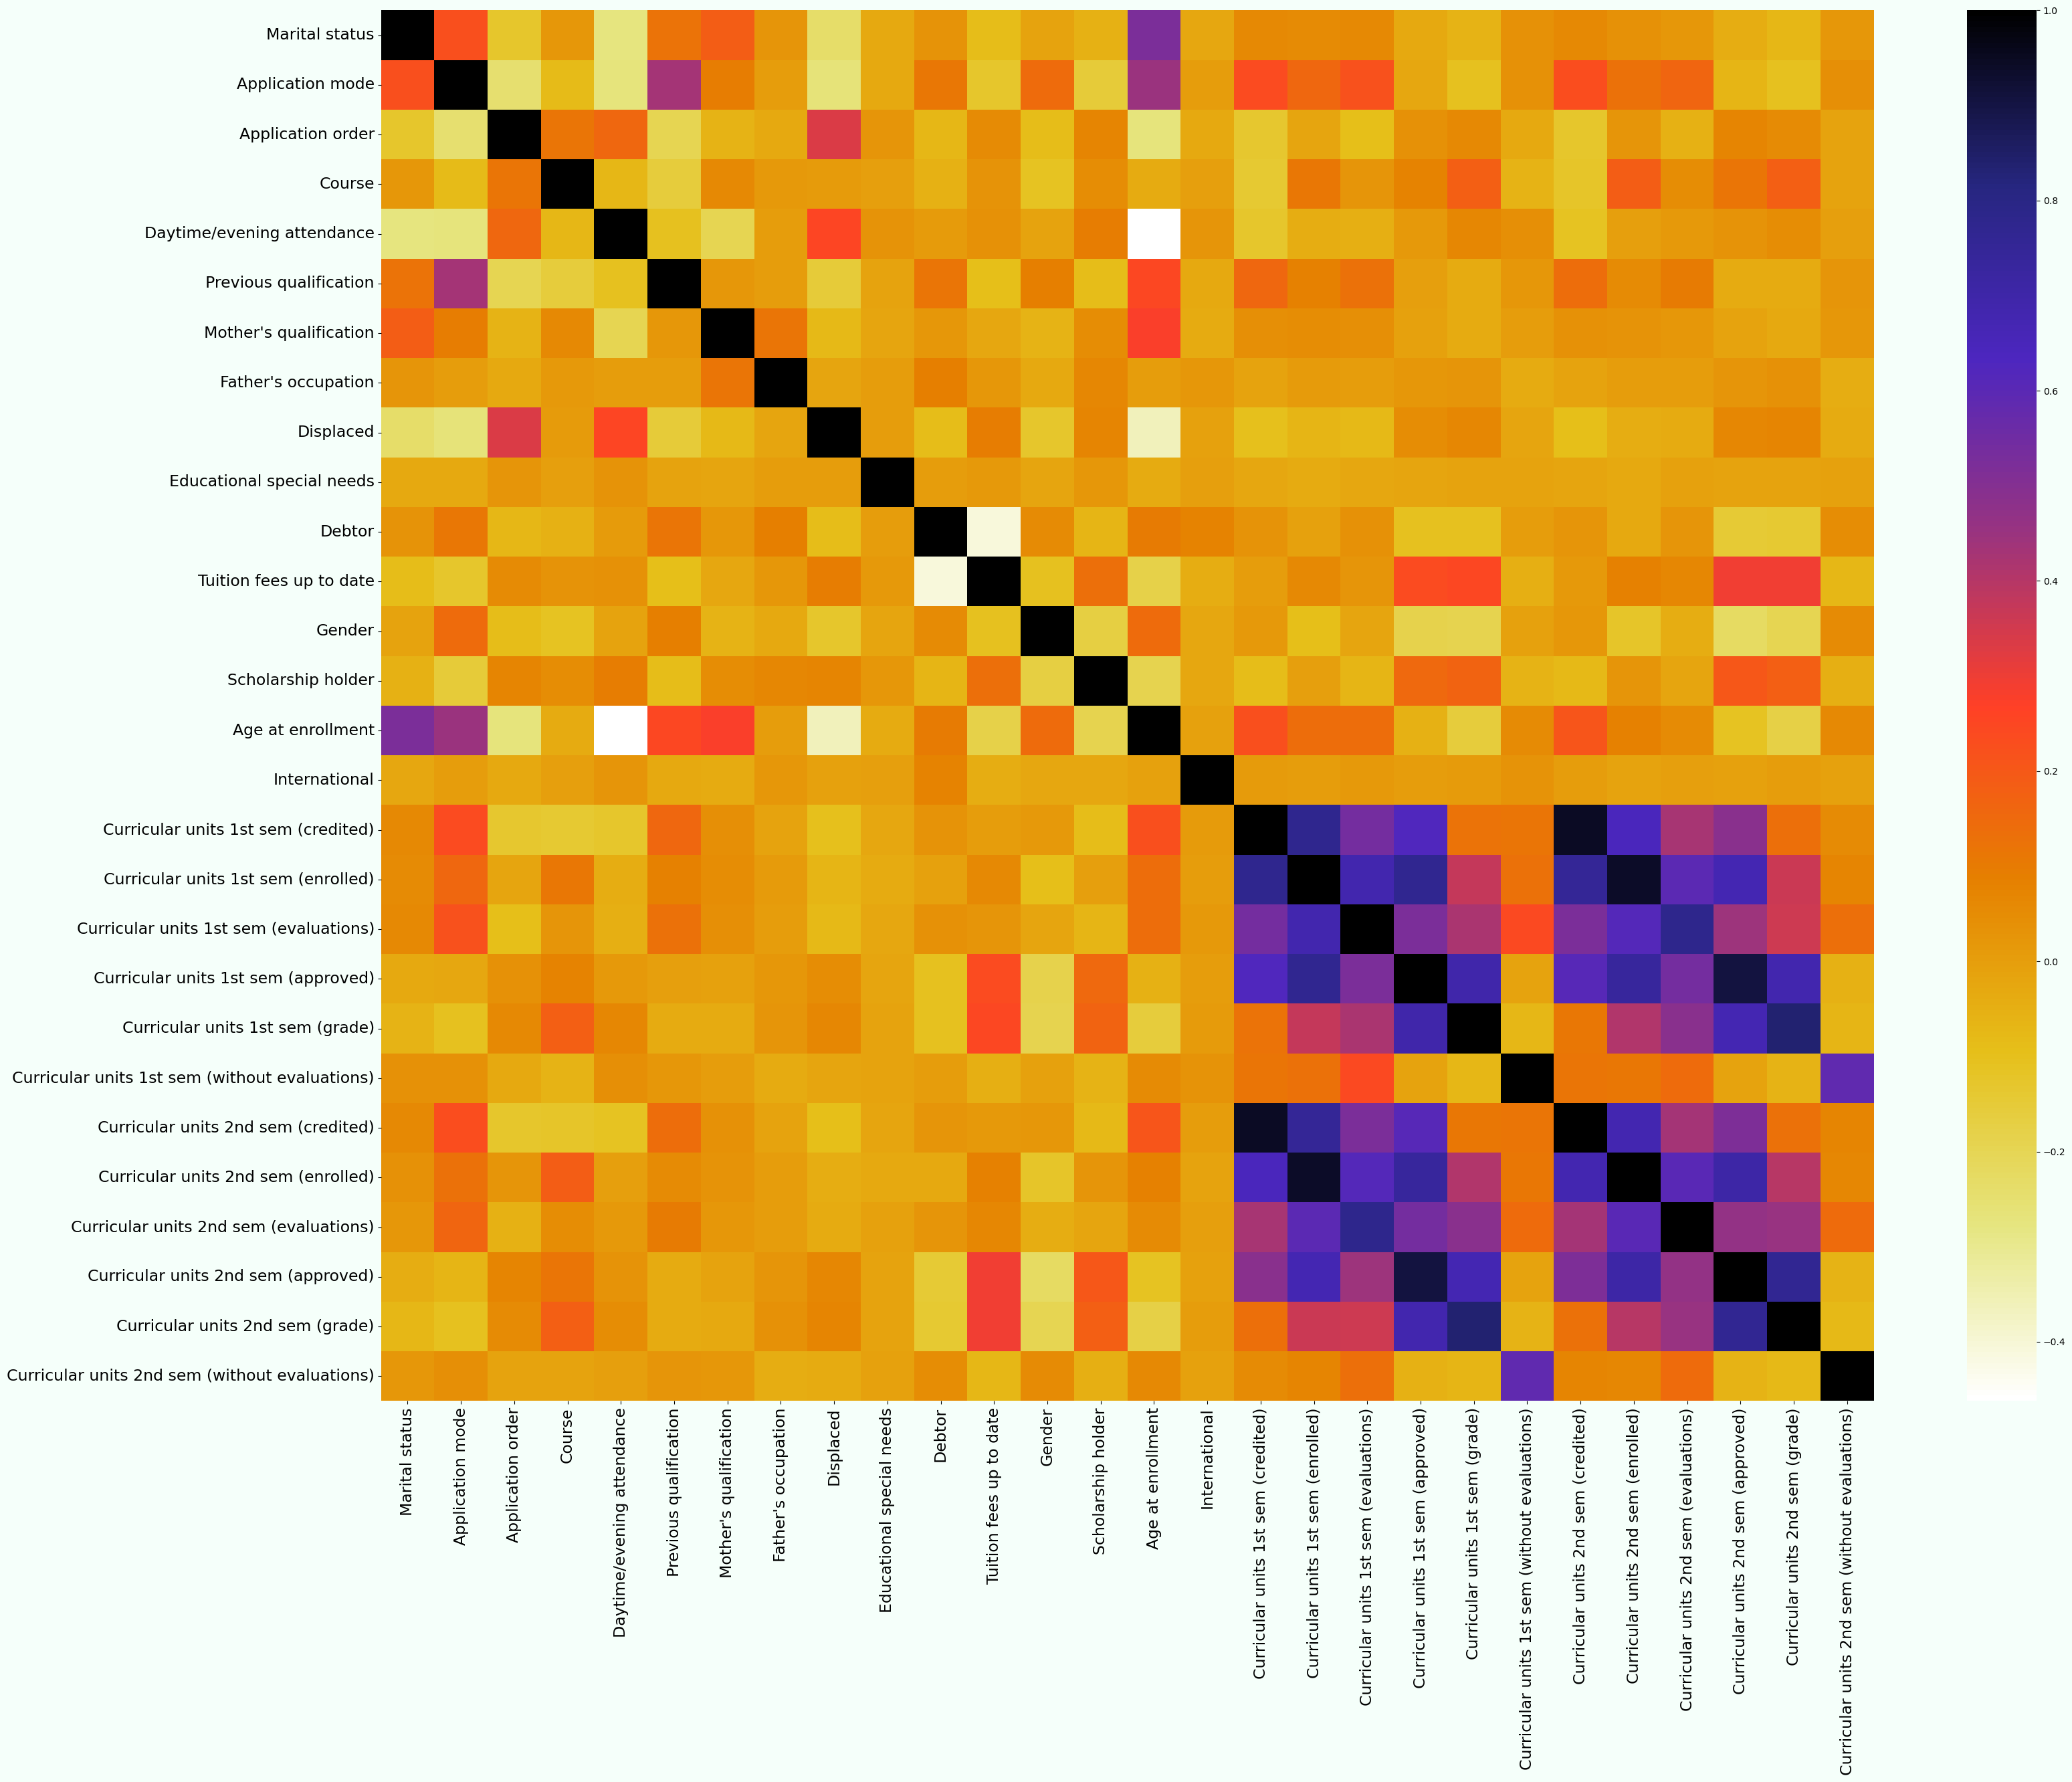

In [ ]:
data_beforepca=data_temp.drop('Target',axis=1)
heatmap(data_beforepca)

In [ ]:
trf1=ColumnTransformer([
    ('other','passthrough',slice(0,15)),
    ('pca',PCA(n_components=1),slice(16,27))
    ],remainder='drop')

In [ ]:
pca_result=trf1.fit_transform(data_temp)
df_pca=pd.DataFrame(data=pca_result[16],columns=['PCA Feature'])
data_temp['Curricular 1st and 2nd sem PCA']=df_pca

In [ ]:
data_temp.drop([
          'Curricular units 1st sem (credited)',
          'Curricular units 1st sem (enrolled)',
          'Curricular units 1st sem (evaluations)',
          'Curricular units 1st sem (without evaluations)',
          'Curricular units 1st sem (approved)',
          'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (credited)',
          'Curricular units 2nd sem (enrolled)',
          'Curricular units 2nd sem (evaluations)',
          'Curricular units 2nd sem (without evaluations)',
          'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)'], axis = 1, inplace = True)

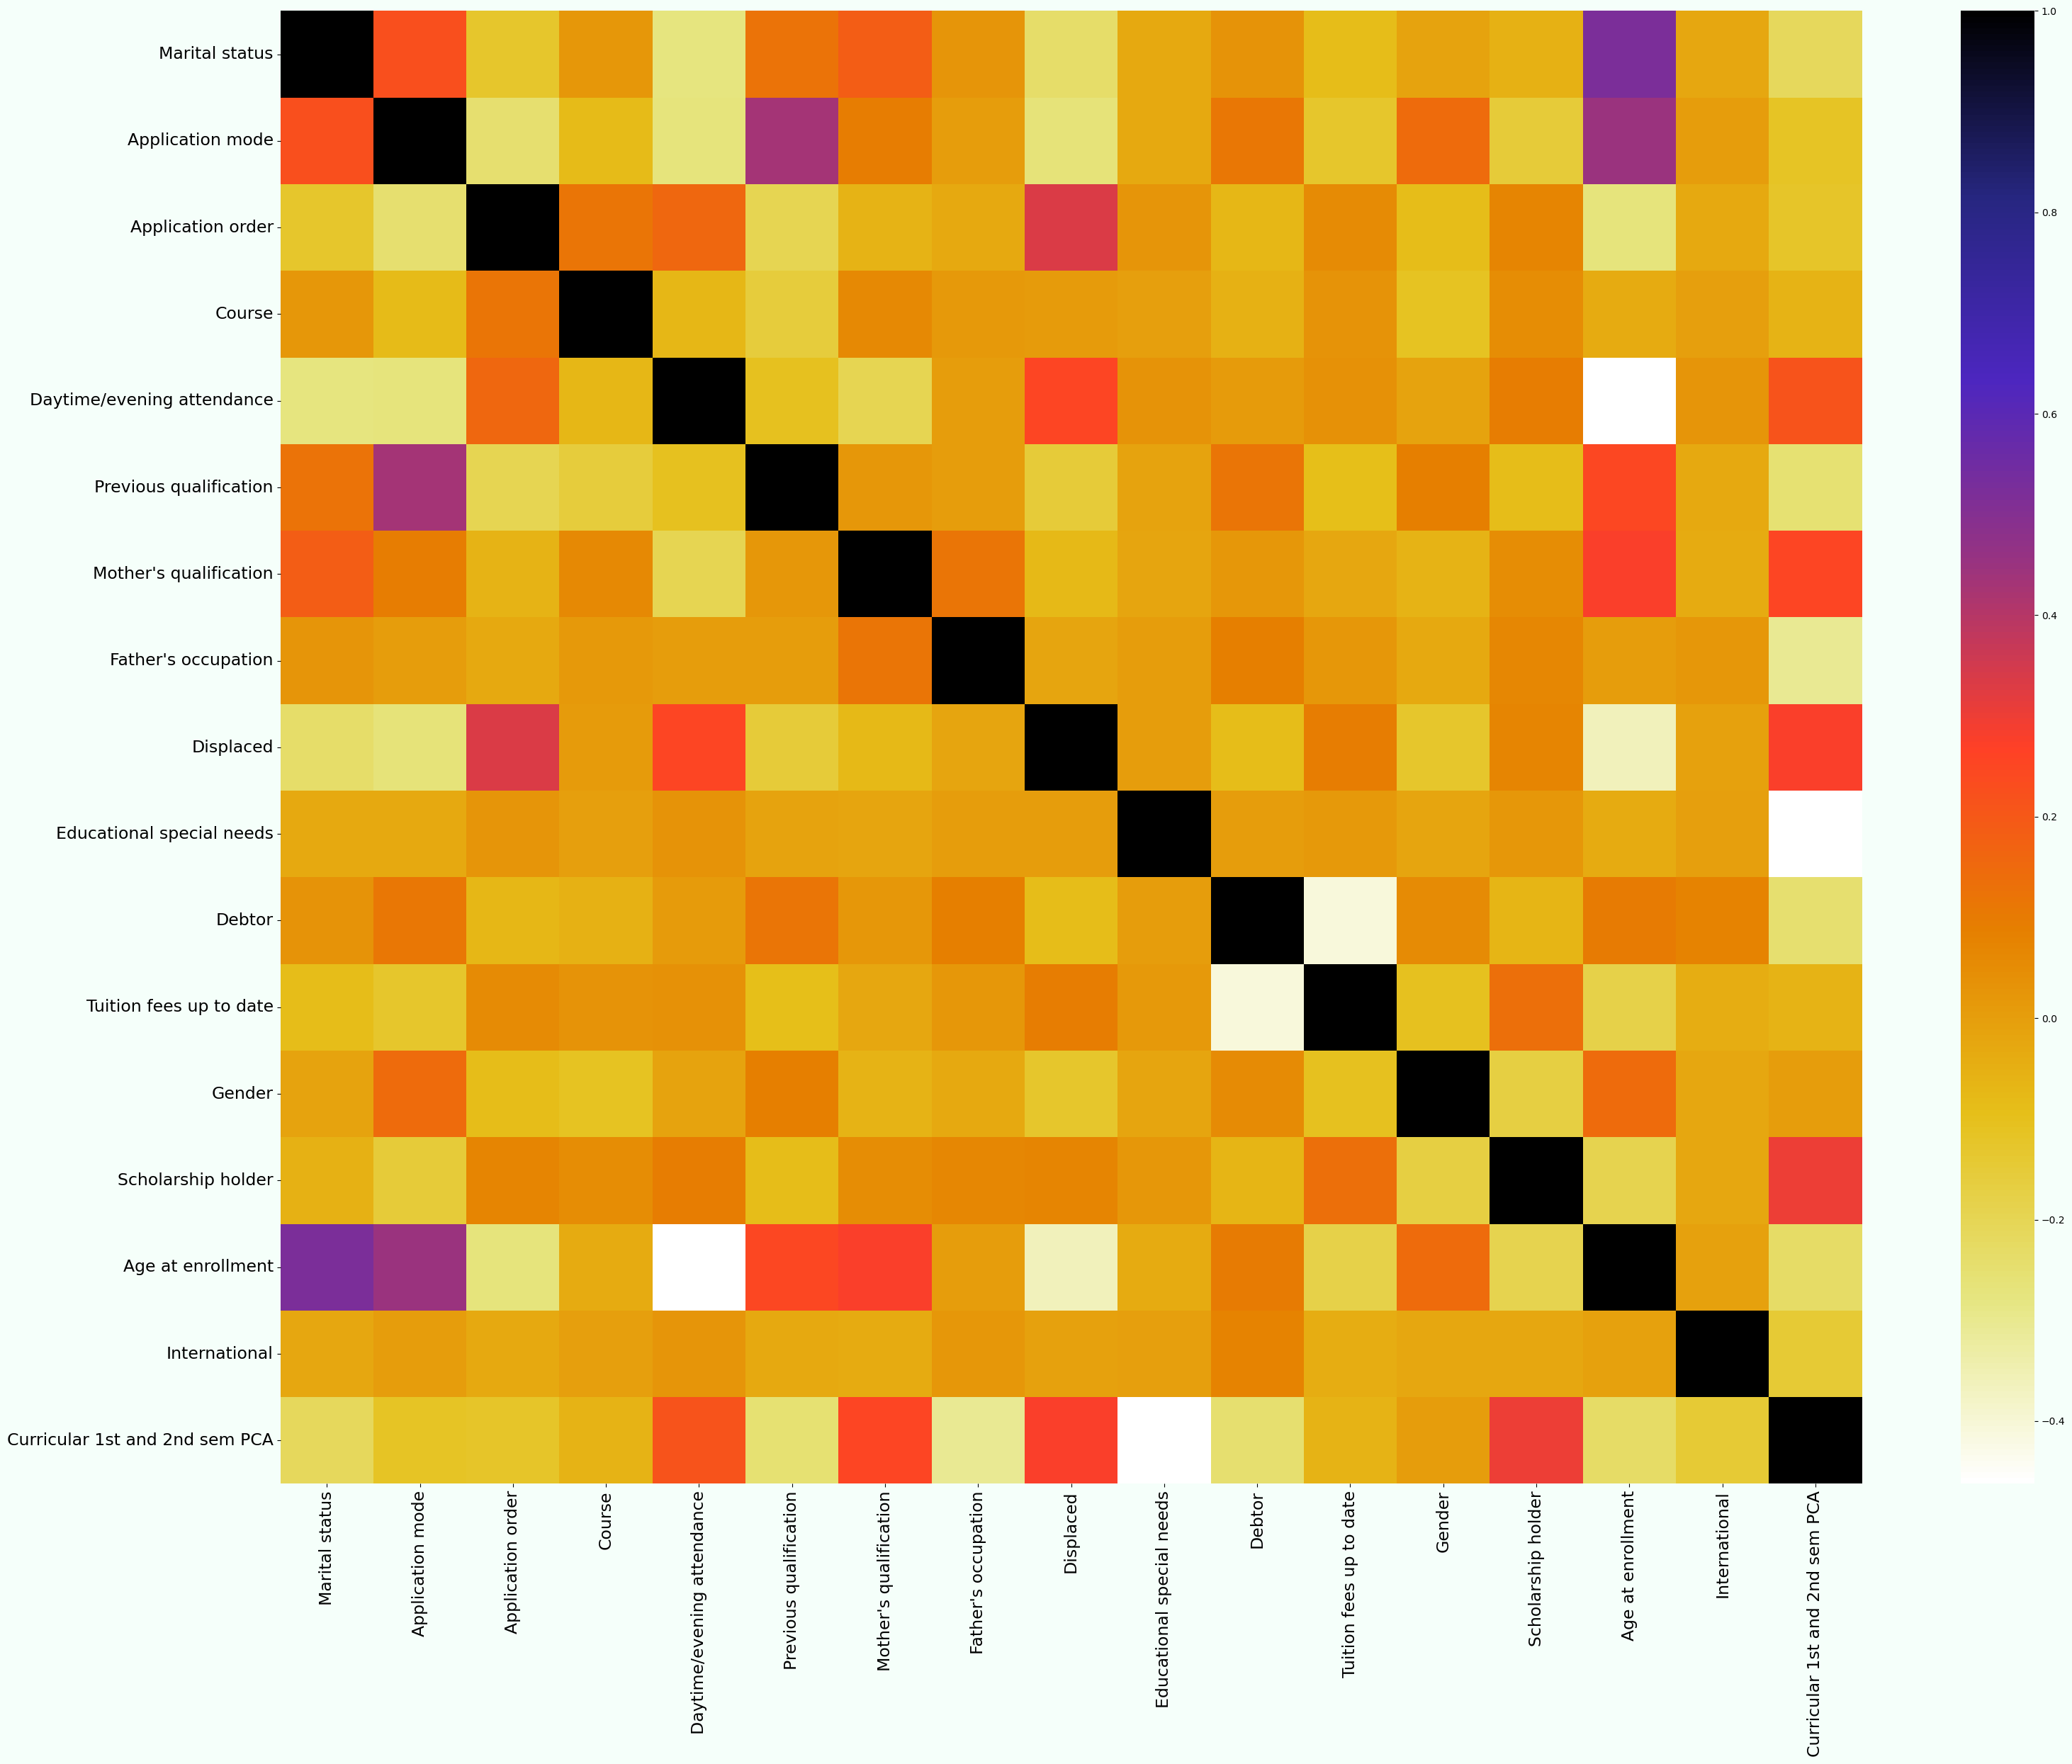

In [ ]:
data_afterpca=data_temp.drop('Target',axis=1)
heatmap(data_afterpca)

In [ ]:
def predictor_target_split(data, target):
    y=data[target]
    X=data.drop(target,axis=1)
    return X,y

In [ ]:
X,y=predictor_target_split(data_temp,'Target')
dummies =pd.get_dummies(y,dtype=int)
dummies.drop(['Enrolled','Graduate'],axis=1,inplace=True)
y=dummies.squeeze()

In [ ]:
X_temptrain,X_temptest,y_temptrain,y_temptest=train_test_split(X,y,test_size=0.2,random_state=42)
X_temptrain,X_val,y_temptrain,y_val=train_test_split(X_temptrain,y_temptrain,test_size=0.2,random_state=42)

In [ ]:
def conf_matrix(y_pred,y_test):
    class_names=['Not Dropout','Dropout']
    tick_marks_y=[0.5,1.5]
    tick_marks_x=[0.5,1.5]
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    confusion_matrix_df=pd.DataFrame(confusion_matrix,range(2),range(2))
    plt.figure(figsize=(6,4.75))
    sns.set(font_scale=1.4)
    plt.title('Confusion Matrix')
    sns.heatmap(confusion_matrix_df,annot=True,annot_kws={'size':16},fmt='d')
    plt.yticks(tick_marks_y,class_names,rotation='vertical')
    plt.xticks(tick_marks_x,class_names,rotation='horizontal')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.grid(False)
    plt.show()

1.DECISION TREE


In [ ]:
param_grid = {
    'max_depth': list(range(1,21)),

}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_temptrain, y_temptrain)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')


Grid search parameters: {'max_depth': 3}


In [ ]:
depth_values=list(range(1,21))
training_acc=[]
validation_acc=[]

for d in tqdm(depth_values):
    tree_model=DecisionTreeClassifier(max_depth=d,random_state=42)
    tree_model.fit(X_temptrain,y_temptrain)
    y_pred_training=tree_model.predict(X_temptrain)
    training_acc.append(f1_score(y_temptrain,y_pred_training))

    y_pred_validation=tree_model.predict(X_val)
    validation_acc.append(f1_score(y_val,y_pred_validation))

100%|██████████| 20/20 [00:00<00:00, 48.56it/s]


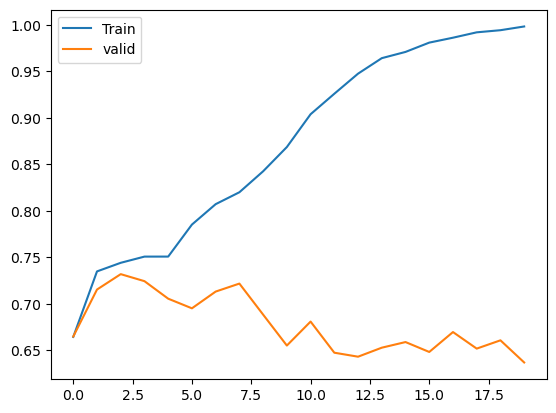

In [ ]:
plt.plot(training_acc,label='Train')
plt.plot(validation_acc,label='valid')

plt.legend()

In [ ]:
best_val_acc=max(validation_acc)
best_depth=validation_acc.index(best_val_acc)+1
print(best_depth)

3


0.7423728813559322
0.9
0.31329113924050633
0.4647887323943662


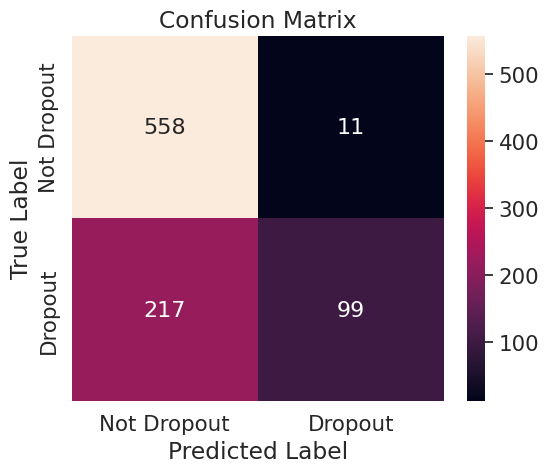

In [ ]:
tree_model=DecisionTreeClassifier(max_depth=3,random_state=42)
tree_model.fit(X_temptrain,y_temptrain)
y_pred=tree_model.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))
conf_matrix(y_pred,y_temptest)
report=classification_report(y_temptest,y_pred,output_dict=True)

In [ ]:
print(report)

{'0': {'precision': 0.8168789808917197, 'recall': 0.9015817223198594, 'f1-score': 0.8571428571428571, 'support': 569.0}, '1': {'precision': 0.7821011673151751, 'recall': 0.6360759493670886, 'f1-score': 0.7015706806282722, 'support': 316.0}, 'accuracy': 0.8067796610169492, 'macro avg': {'precision': 0.7994900741034474, 'recall': 0.7688288358434741, 'f1-score': 0.7793567688855647, 'support': 885.0}, 'weighted avg': {'precision': 0.8044611401118461, 'recall': 0.8067796610169492, 'f1-score': 0.8015939217997963, 'support': 885.0}}


In [ ]:
np.exp(tree_model.feature_importances_)

array([1.        , 1.0097491 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.20281707, 1.        , 1.        , 1.03648322,
       1.        , 2.15933064])

2.RANDOMFOREST CLASSIFIER

In [ ]:
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_temptrain,y_temptrain)
y_pred=random_forest.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))


0.8146892655367232
0.8333333333333334
0.6012658227848101
0.6985294117647058


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
# Using Grid search to determine best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_temptrain, y_temptrain)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')

Grid search parameters: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}


0.7457627118644068
0.9099099099099099
0.31962025316455694
0.47306791569086654


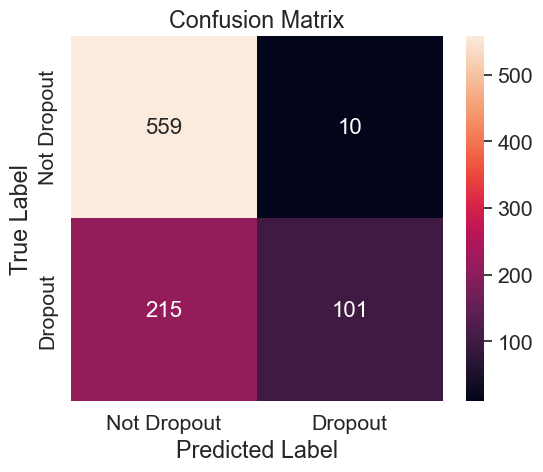

In [ ]:
rf_model=RandomForestClassifier(max_depth=3,max_features='sqrt',max_leaf_nodes=9,n_estimators=100,random_state=42)
rf_model.fit(X_temptrain,y_temptrain)
y_pred=rf_model.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))
conf_matrix(y_pred,y_temptest)
report_rf=classification_report(y_temptest,y_pred,output_dict=True)

In [ ]:
print(report_rf)

{'0': {'precision': 0.7222222222222222, 'recall': 0.9824253075571178, 'f1-score': 0.8324646314221892, 'support': 569.0}, '1': {'precision': 0.9099099099099099, 'recall': 0.31962025316455694, 'f1-score': 0.47306791569086654, 'support': 316.0}, 'accuracy': 0.7457627118644068, 'macro avg': {'precision': 0.8160660660660661, 'recall': 0.6510227803608374, 'f1-score': 0.6527662735565278, 'support': 885.0}, 'weighted avg': {'precision': 0.7892383909333062, 'recall': 0.7457627118644068, 'f1-score': 0.7041376685169938, 'support': 885.0}}


In [ ]:
np.exp(rf_model.feature_importances_)

array([1.00377825, 1.03311725, 1.00073448, 1.02823341, 1.00072407,
       1.00767481, 1.00322885, 1.0051718 , 1.00186799, 1.        ,
       1.03201388, 1.25640229, 1.01576965, 1.0490578 , 1.08258698,
       1.00047593, 1.67083132])

3.ExtraaTree classifier

In [ ]:
extratree_model=ExtraTreesClassifier(random_state=42)
extratree_model.fit(X_temptrain,y_temptrain)
y_pred=extratree_model.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))

0.7954802259887006
0.8026905829596412
0.5664556962025317
0.6641929499072357


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'criterion':['gini','entropy'],
}
grid_search = GridSearchCV(ExtraTreesClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_temptrain, y_temptrain)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')

Grid search parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'n_estimators': 100}


0.8305084745762712
0.8952380952380953
0.5949367088607594
0.714828897338403


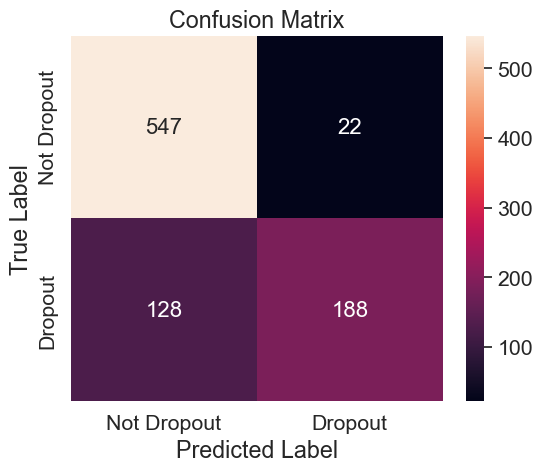

In [ ]:
extratree_model=ExtraTreesClassifier(max_depth=9,criterion='entropy',max_features=None,n_estimators=100,random_state=42)
extratree_model.fit(X_temptrain,y_temptrain)
y_pred=extratree_model.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))
conf_matrix(y_pred,y_temptest)

4.XGBoost classifier

In [ ]:
xgboost=XGBClassifier(random_state=42)
xgboost.fit(X_temptrain,y_temptrain)
y_pred=xgboost.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))

0.7412429378531074
0.6883116883116883
0.5031645569620253
0.5813528336380256


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3, 6, 9],
    'gamma':[0,0.1,0.2],
}
grid_search = GridSearchCV(XGBClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_temptrain, y_temptrain)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')

Grid search parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


0.8293785310734463
0.8873239436619719
0.5981012658227848
0.7145557655954632


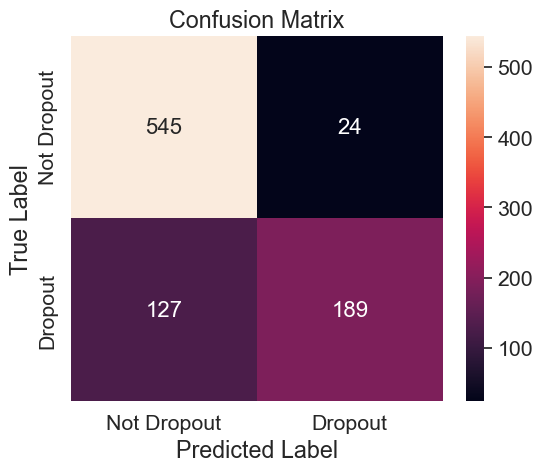

In [ ]:
xgboost=XGBClassifier(max_depth=3,gamma=0.2,learning_rate=0.1,n_estimators=100,random_state=42)
xgboost.fit(X_temptrain,y_temptrain)
y_pred=xgboost.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))
conf_matrix(y_pred,y_temptest)

In [ ]:
lgboost=lgb.LGBMClassifier(objective='binary',metric='binary_logloss')
lgboost.fit(X_temptrain,y_temptrain)
y_pred=lgboost.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 879, number of negative: 1952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.310491 -> initscore=-0.797825
[LightGBM] [Info] Start training from score -0.797825
0.751412429378531
0.7285714285714285
0.48417721518987344
0.5817490494296578


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3, 6, 9],
    'objective': ['binary'],
    'metric': ['binary_logloss'],

}
grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_temptrain, y_temptrain)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 879, number of negative: 1952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.310491 -> initscore=-0.797825
[LightGBM] [Info] Start training from score -0.797825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

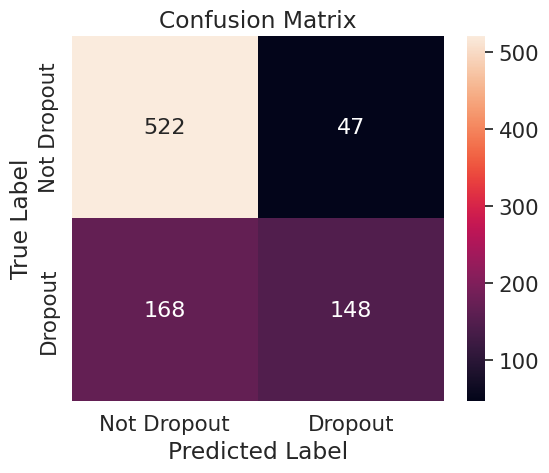

In [ ]:
lgboost=lgb.LGBMClassifier(max_depth=3,gamma=0.2,learning_rate=0.2,n_estimators=100,objective='binary',metric='binary_logloss')
lgboost.fit(X_temptrain,y_temptrain)
y_pred=lgboost.predict(X_temptest)
print(accuracy_score(y_temptest,y_pred))
print(precision_score(y_temptest,y_pred))
print(recall_score(y_temptest,y_pred))
print(f1_score(y_temptest,y_pred))
conf_matrix(y_pred,y_temptest)

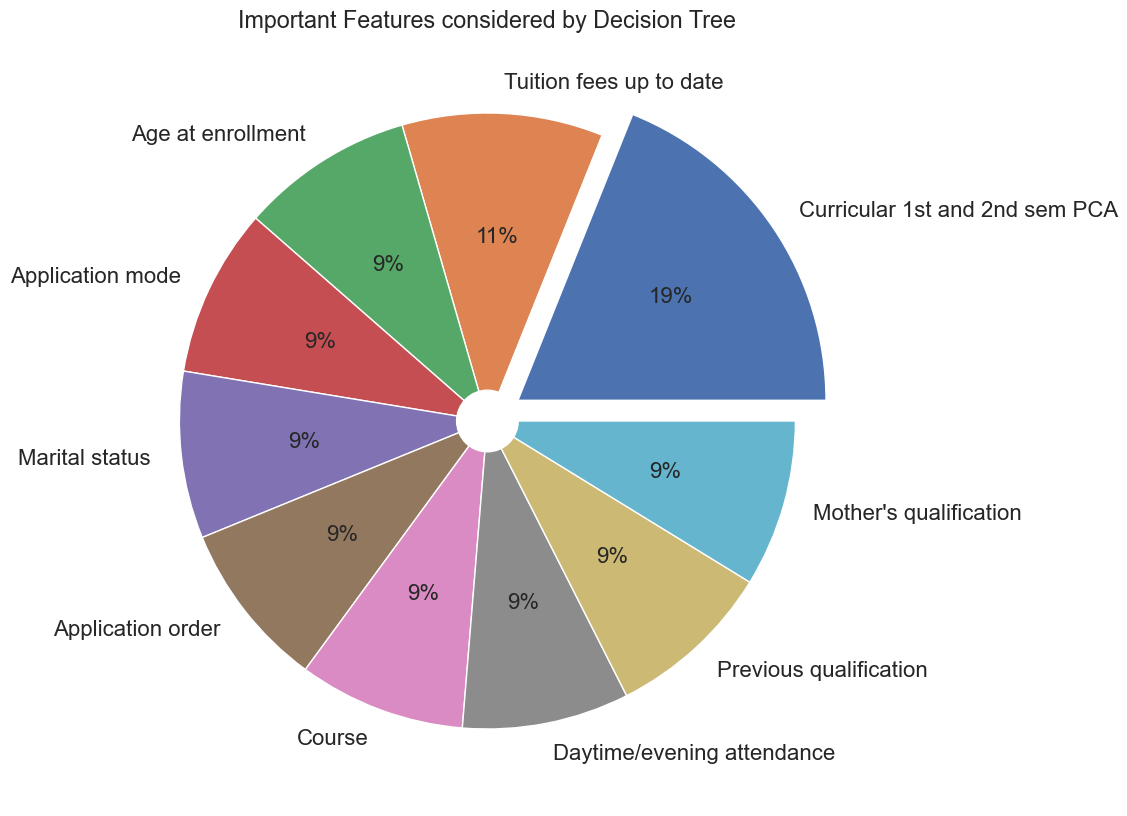

In [ ]:
feat_importances=pd.Series(np.exp(tree_model.feature_importances_),index=X_temptrain.columns)
plt.figure(figsize=(10,10))
myexplode=[0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index,autopct='%.0f%%',explode=myexplode,textprops={'fontsize':16})
centre_circle=plt.Circle((0,0),0.10,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important Features considered by Decision Tree')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
pipe=Pipeline(steps=[
    ('pca',trf1),
    ('model',DecisionTreeClassifier(max_depth=3,random_state=42))
])

In [ ]:
#Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('pca',
                 ColumnTransformer(transformers=[('other', 'passthrough',
                                                  slice(0, 15, None)),
                                                 ('pca', PCA(n_components=1),
                                                  slice(16, 27, None))])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [ ]:
mlflow.set_experiment('Random Forest')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

with mlflow.start_run():
    mlflow.log_params(param_grid)
    mlflow.log_metrics({
        'accuracy':report_rf['accuracy'],
        'precision_class0':report_rf['0']['precision'],
        'precision_class1':report_rf['1']['precision'],
        'recall_class0':report_rf['0']['recall'],
        'recall_class1':report_rf['1']['recall'],
        'f1-score_macro':report_rf['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(rf_model,'Random forest')

2025/12/26 18:45:31 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest' does not exist. Creating a new experiment.
2025/12/26 18:45:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run powerful-croc-195 at: http://127.0.0.1:5000/#/experiments/1/runs/11eb840a9b3f473cb6af99da3ad25fd4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
